In [1]:
import numpy as np
import pandas as pd
import math
import bike
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tss_dict = {'olympic': 
                {'swim': {'min': 30, 'max': 40},
                 'bike': {'min': 90, 'max': 110},
                 'run': {'min': 50, 'max': 70}},
            'half':
                {'swim': {'min': 50, 'max': 70},
                 'bike': {'min': 160, 'max': 190},
                 'run': {'min': 110, 'max': 130}},
            'full':
                {'swim': {'min': 100, 'max': 130},
                 'bike': {'min': 280, 'max': 360},
                 'run': {'min': 200, 'max': 250}}}

In [3]:
dist_dict = {'olympic': 
                {'swim': 0.93,
                'bike': 24.85,
                'run': 6.21},
            'half':
                {'swim': 1.2,
                'bike': 56,
                'run': 13.1},
            'full':
                {'swim': 2.4,
                'bike': 112,
                'run': 26.2}}

In [4]:
race_type = 'half'

In [5]:
css = '0:01:23' #min/100yd
swim_if = 0.92

In [6]:
bike_course = 'GPX-Route_6863_340.gpx'
bike_ftp = 240 #W
mass = 75
intensities = [0.5, 0.65, 0.75, .85, .95, 1.2]

In [7]:
run_ftpa = '0:06:59' #min/mile
run_if = 0.79

In [8]:
css_yd_min = 100 / (time.strptime(css, '%H:%M:%S')[4] + time.strptime(css, '%H:%M:%S')[5]/60)
swim_speed_yd_min = css_yd_min * swim_if
swim_pace_min_100yd = 100 / swim_speed_yd_min
swim_time = (dist_dict[race_type]['swim'] * 1760) / (swim_speed_yd_min * 60)
swim_tss = swim_if**3 * 100 * swim_time

In [9]:
bike = bike.Bike(bike_course, bike_ftp, mass, intensities)
bike.predict()
bike_time = bike.total_time
norm_power = bike.norm_power
avg_power = bike.avg_power
vi = bike.vi
bike_tss = bike.tss

In [10]:
run_ftp = 60 / (time.strptime(run_ftpa, '%H:%M:%S')[4] + time.strptime(run_ftpa, '%H:%M:%S')[5]/60)
run_speed_mph = run_ftp * run_if
run_pace_min_mi = 60 / run_speed_mph
run_time = dist_dict[race_type]['run'] / run_speed_mph
run_tss = run_if**2 * 100 * run_time

In [11]:
race_time = swim_time + bike_time + run_time + (3/60)
race_tss = swim_tss + bike_tss + run_tss

In [12]:
print('Swim Data\n' + 
      'Swim time is {:}'.format(time.strftime("%H:%M:%S", time.gmtime(swim_time*60*60))) + '.\n' +
      'Swim TSS is {:.2f}'.format(swim_tss) + '.\n' + 
      'Swim pace is {:}'.format(time.strftime("%H:%M:%S", time.gmtime(swim_pace_min_100yd*60))) + '/100yd.\n')

print('Bike Data\n' +
      'Bike time is {:}'.format(time.strftime("%H:%M:%S", time.gmtime(bike_time*60*60))) + '.\n' +
      'Bike TSS is {:.2f}'.format(bike_tss) + '.\n' + 
      'Bike power is {:.2f}'.format(avg_power) + ' W.\n')

print('Run Data\n' +
      'Run time is {:}'.format(time.strftime("%H:%M:%S", time.gmtime(run_time*60*60))) + '.\n' + 
      'Run TSS is {:.2f}'.format(run_tss) + '.\n' + 
      'Run pace is {:}'.format(time.strftime("%H:%M:%S", time.gmtime(run_pace_min_mi*60))) + '/mi.\n')

print('Race Data\n' +
      'Race time is {:}'.format(time.strftime("%H:%M:%S", time.gmtime(race_time*60*60))) + '.\n' +
      'Race TSS is {:.2f}'.format(race_tss) + '.')

Swim Data
Swim time is 00:31:45.
Swim TSS is 41.21.
Swim pace is 00:01:30/100yd.

Bike Data
Bike time is 03:04:31.
Bike TSS is 184.72.
Bike power is 179.82 W.

Run Data
Run time is 01:55:47.
Run TSS is 120.45.
Run pace is 00:08:50/mi.

Race Data
Race time is 05:35:04.
Race TSS is 346.38.


In [14]:
bike.intensity_factor

0.775

In [15]:
bike.vi

1.0343719211876012

In [16]:
bike.norm_power

186

In [20]:
d = np.zeros(len(bike.distance))

In [29]:
for i in range(1, len(bike.distance)):
    d[i] = bike.distance[i] + d[i-1]

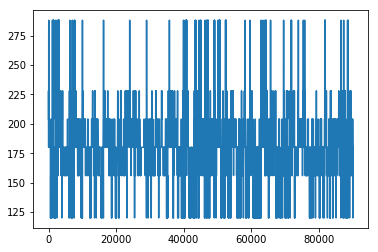

In [31]:
plt.plot(d, bike.power)